In [3]:
%run convergence.py
%run axion_decay.py
%run test.py

In [20]:
%%time
H_inf = 2e12
f_a = 3e14
Gamma_inf_list = np.geomspace(1e6, 1e9, 11)
m_a_list = np.geomspace(1e6, 1e9, 10)
def f(Gamma_inf, m_a, i, j):
    n = i + j * len(m_a_list) + 1
    print("step:", n, "of", len(Gamma_inf_list) * len(m_a_list), end="")
    start = time.time()
    x = compute_asymmetry(H_inf, Gamma_inf, (m_a,), f_a, calc_init_time=True)
    end = time.time()
    print(" done (%f seconds)" % (end - start))
    return x
ans = np.array([[f(Gamma_inf, m_a, i, j) 
                 for i, m_a in enumerate(m_a_list)] for j, Gamma_inf in enumerate(Gamma_inf_list)])

step: 1 of 110

/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:81: RuntimeWarning: divide by zero encountered in true_divide
  T_dot = np.where(T == 0, np.inf, T_dot_const * (Gamma * rho_field - 4*H*rho_rad) / T**3)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:81: RuntimeWarning: divide by zero encountered in double_scalars
  T_dot = np.where(T == 0, np.inf, T_dot_const * (Gamma * rho_field - 4*H*rho_rad) / T**3)
/home/jana/Documents/masters-project/transport_eq_in_time/convergence.py:95: RuntimeWarning: invalid value encountered in log
  log_ts_inf = np.linspace(np.log(decay_process.t0 + tmax_inf_time - conv_factor * step_tmax_axion_time),
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:12: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(rho_field + rho_rad) * C


 done (2.331135 seconds)
step: 2 of 110 done (2.079466 seconds)
step: 3 of 110 done (2.303266 seconds)
step: 4 of 110 done (2.185461 seconds)
step: 5 of 110 done (2.100917 seconds)
step: 6 of 110 done (2.072729 seconds)
step: 7 of 110 done (1.952954 seconds)
step: 8 of 110 done (1.816943 seconds)
step: 9 of 110 done (1.714194 seconds)
step: 10 of 110 done (1.670844 seconds)
step: 11 of 110 done (1.968071 seconds)
step: 12 of 110 done (2.112707 seconds)
step: 13 of 110 done (2.505734 seconds)
step: 14 of 110 done (2.345532 seconds)
step: 15 of 110 done (2.094394 seconds)
step: 16 of 110 done (2.189892 seconds)
step: 17 of 110 done (2.263719 seconds)
step: 18 of 110 done (1.827065 seconds)
step: 19 of 110 done (1.798234 seconds)
step: 20 of 110 done (1.807319 seconds)
step: 21 of 110 done (2.005233 seconds)
step: 22 of 110 done (1.924167 seconds)
step: 23 of 110 done (2.050563 seconds)
step: 24 of 110 done (2.082658 seconds)
step: 25 of 110 done (2.081428 seconds)
step: 26 of 110 done (1

/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:9: RuntimeWarning: overflow encountered in exp
  t = np.exp(log_t)


 done (2.626472 seconds)
step: 102 of 110 done (2.592903 seconds)
step: 103 of 110 done (2.310859 seconds)
step: 104 of 110 done (2.442066 seconds)
step: 105 of 110 done (2.512968 seconds)
step: 106 of 110 done (2.403383 seconds)
step: 107 of 110 done (2.308908 seconds)
step: 108 of 110 done (2.244487 seconds)
step: 109 of 110 done (2.166348 seconds)
step: 110 of 110 done (2.089195 seconds)
CPU times: user 3min 49s, sys: 705 ms, total: 3min 50s
Wall time: 3min 50s


In [21]:
eta = ans[:, :, 0] * ans[:, :, 1]
f_numerical = ans[:, :, 0]

Text(0, 0.5, '$\\Gamma_\\mathrm{inf}$ / GeV')

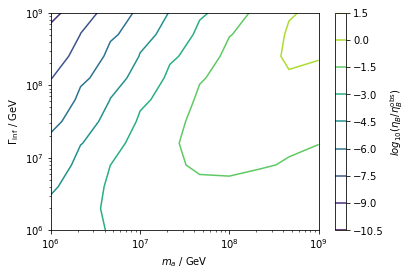

In [22]:
eta_observed = 6e-10 # from paper
plt.contour(m_a_list, Gamma_inf_list, np.log10(eta / eta_observed))
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label=r"$log_{10}(\eta_B / \eta_B^\mathrm{obs})$")
plt.xlabel("$m_a$ / GeV")
plt.ylabel(r"$\Gamma_\mathrm{inf}$ / GeV")

In [24]:
 f_paper = np.array([[1 / np.maximum(1.0, 
    2*np.pi**2 * f_a**3 / (axion_motion.single_axion_field.alpha * m_a * decay_process.M_pl**2) * np.minimum(1, (Gamma_inf / m_a)**0.5))
             for m_a in m_a_list] for Gamma_inf in Gamma_inf_list])

Text(0, 0.5, '$\\Gamma_\\mathrm{inf}$ / GeV')

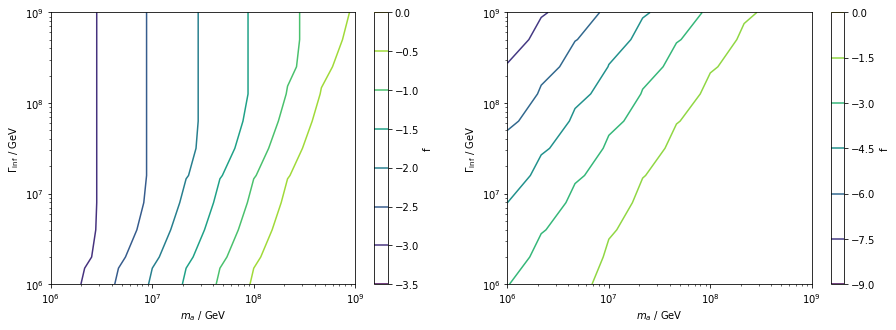

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.contour(m_a_list, Gamma_inf_list, np.log10(f_paper))
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label="f")
plt.xlabel("$m_a$ / GeV")
plt.ylabel(r"$\Gamma_\mathrm{inf}$ / GeV")
plt.subplot(1,2,2)
plt.contour(m_a_list, Gamma_inf_list, np.log10(f_numerical))
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label="f")
plt.xlabel("$m_a$ / GeV")
plt.ylabel(r"$\Gamma_\mathrm{inf}$ / GeV")

/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:12: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(rho_field + rho_rad) * C


interval: -10.42609380137134 41.89162470333911
delta = 1748.0470915206943 vs 0.001
interval: 41.89162470333911 41.986934883143434
delta = 9.070690892845089e-05 vs 0.001


/home/jana/Documents/masters-project/transport_eq_in_time/axion_decay.py:18: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/masters-project/transport_eq_in_time/axion_decay.py:21: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:12: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(rho_field + rho_rad) * C


interval: -10.426093785360028 21.1683588663927
delta = 1.6720418779133983e-14 vs 0.001


/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:12: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(rho_field + rho_rad) * C


interval: -17.33278220177185 41.89162470333911
delta = 2183.3984244946887 vs 0.001
interval: 41.89162470333911 41.986934883143434
delta = 9.070863943640411e-05 vs 0.001


/home/jana/Documents/masters-project/transport_eq_in_time/axion_decay.py:18: RuntimeWarning: overflow encountered in exp
  rho_R, rho_a, R = np.exp(y)
/home/jana/Documents/masters-project/transport_eq_in_time/axion_decay.py:21: RuntimeWarning: invalid value encountered in double_scalars
  d_log_rho_R_d_log_t = - t * (4 * H - Gamma_a * rho_a / rho_R)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:12: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(rho_field + rho_rad) * C


interval: -17.33278221718217 21.1683588663927
delta = 1.612135558838237 vs 0.001
interval: 21.1683588663927 21.263669046197027
delta = 6.122667657055263e-05 vs 0.001


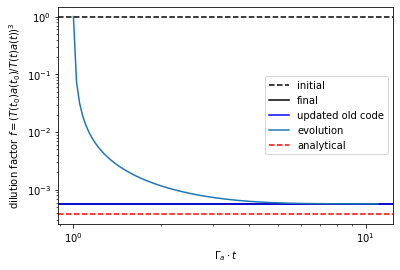

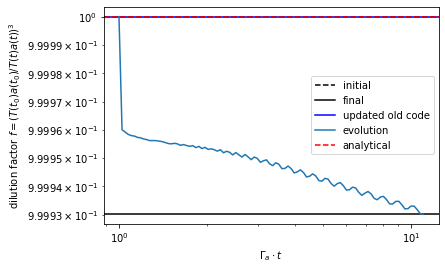

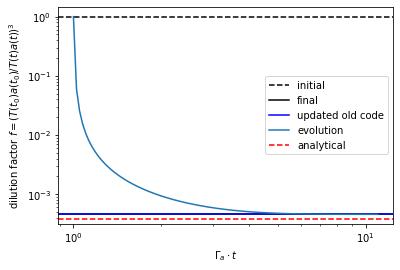

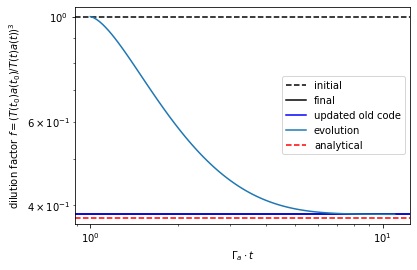

In [19]:
%run axion_decay.py

def decay(Gamma_inf, m_a, d=False): 
    H0 = 2e10
    tmax_inf = 30.0
    axion_decay_time = 10.0
    f_a = 3e14
    rho_inf_init = H0**2*decay_process.M_pl**2*3
    scale = decay_process.find_scale(Gamma_inf)
    energy_scale = axion_motion.single_axion_field.find_dynamical_scale(m_a)
    conv_factor = Gamma_inf / energy_scale
    tmax_axion = tmax_inf / conv_factor
    sol_rh = decay_process.solve(tmax_inf, 0.0, rho_inf_init, scale, Gamma_inf, debug=d);
    T_and_H_fn, T_and_H_and_T_dot_fn = decay_process.to_temperature_and_hubble_fns(sol_rh, rho_inf_init, scale, Gamma_inf, debug=d)
    sol_axion = axion_motion.single_axion_field.solve((1.0, 0.0), (m_a,), tmax_axion, T_and_H_fn, Gamma_inf, debug=d)
    
    Gamma_axion = axion_motion.single_axion_field.get_decay_constant(f_a, m_a)
    axion_scale = decay_process.find_scale(Gamma_axion)
    rho_end_axion = axion_motion.single_axion_field.get_energy(sol_axion.y[:, -1], f_a, Gamma_inf, m_a)
    rho_end_rad = decay_process.find_end_rad_energy(sol_rh, scale)
    sol_axion_decay = decay_process.solve(axion_decay_time, rho_end_rad, rho_end_axion, axion_scale, Gamma_axion, debug=d)
    T_and_H_fn_axion, _ = decay_process.to_temperature_and_hubble_fns(sol_axion_decay, rho_end_axion, axion_scale, Gamma_axion, debug=d)
    
    f_analytical = 1 / np.maximum(1.0, 2*np.pi**2 * f_a**3 / 
        (axion_motion.single_axion_field.alpha * m_a * decay_process.M_pl**2) * 
                                  np.minimum(1, (Gamma_inf / m_a)**0.5))
    
    theta, theta_dot = sol_axion.sol(sol_axion.t[-1])
    theta_dot *= Gamma_inf
    T_start = T_and_H_fn(np.exp(sol_rh.t[-1]))[0]
    f_old = compute_axion_decay(T_start, 1.0, theta, theta_dot, m_a, f_a, Gamma_axion)
    
    plt.figure()
    ts = np.geomspace(decay_process.t0, decay_process.t0 + axion_decay_time, 100) # ts is in axion decay units
    fs = decay_process.find_dilution_factor(sol_axion_decay, T_and_H_fn_axion, ts)
    plt.axhline(fs[0], ls="--", color="black", label="initial")
    plt.axhline(fs[-1], ls="-", color="black", label="final")
    plt.axhline(f_old, color="blue", label="updated old code")
    plt.loglog(ts, fs, label="evolution")
    plt.axhline(f_analytical, color="red", ls="--", label="analytical")
    plt.xlabel(r"$\Gamma_a \cdot t$")
    plt.ylabel(r"dilution factor $f = (T(t_0) a(t_0) / T(t) a(t))^3$")
    plt.legend()

for Gamma_inf in [1e6, 1e9]:
    for m_a in [1e6, 1e9]:
        decay(Gamma_inf, m_a)

/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:12: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(rho_field + rho_rad) * C


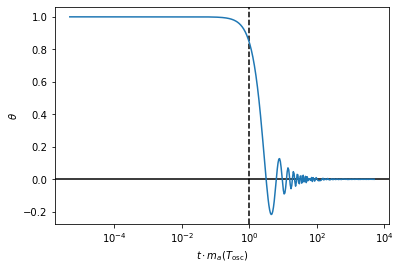

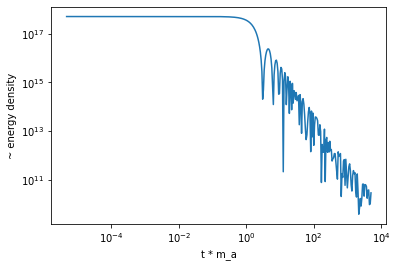

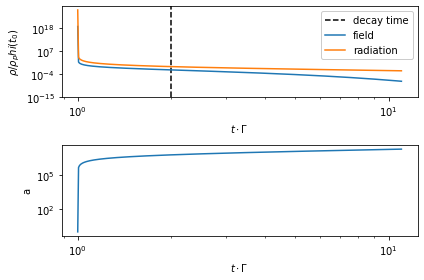

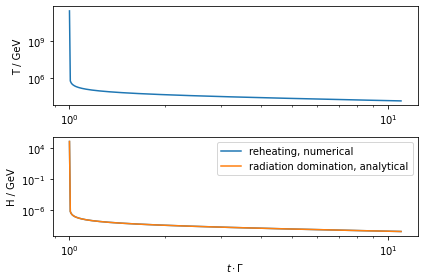

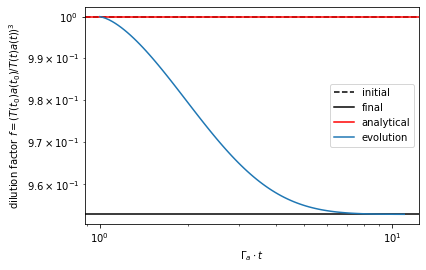

In [91]:
decay(1e9, 1e6, True)

In [ ]:
compute_axion_decay(T_start, red_chem_B_minus_L, theta, theta_dot, m_a, f_a, axion_decay_rate)